In [1]:
from google.colab import files
uploaded = files.upload()


Saving transport_data.csv to transport_data.csv


In [2]:
import pandas as pd

df = pd.read_csv("transport_data.csv")
df.head()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


In [4]:
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-4-b9c6864122be>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.columns


Index(['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route',
       'School', 'Other'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()


In [9]:
print(df.columns.tolist())


['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']


In [10]:
df_melted = df.melt(id_vars=['Date'],
                    value_vars=['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other'],
                    var_name='Service Type',
                    value_name='Passenger Journeys')
df_melted.head()


,Date,Service Type,Passenger Journeys
0,2024-08-30,Local Route,16436.0
1,2023-09-15,Local Route,15499.0
2,2021-12-28,Local Route,1756.0
3,2023-01-11,Local Route,10536.0
4,2021-09-11,Local Route,820.0


In [11]:
df_melted['Date'] = pd.to_datetime(df_melted['Date'])


In [12]:
df_grouped = df_melted.groupby(['Date', 'Service Type'])['Passenger Journeys'].sum().reset_index()
df_grouped.head()


,Date,Service Type,Passenger Journeys
0,2019-07-01,Light Rail,9962.0
1,2019-07-01,Local Route,15987.0
2,2019-07-01,Other,0.0
3,2019-07-01,Peak Service,407.0
4,2019-07-01,Rapid Route,21223.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


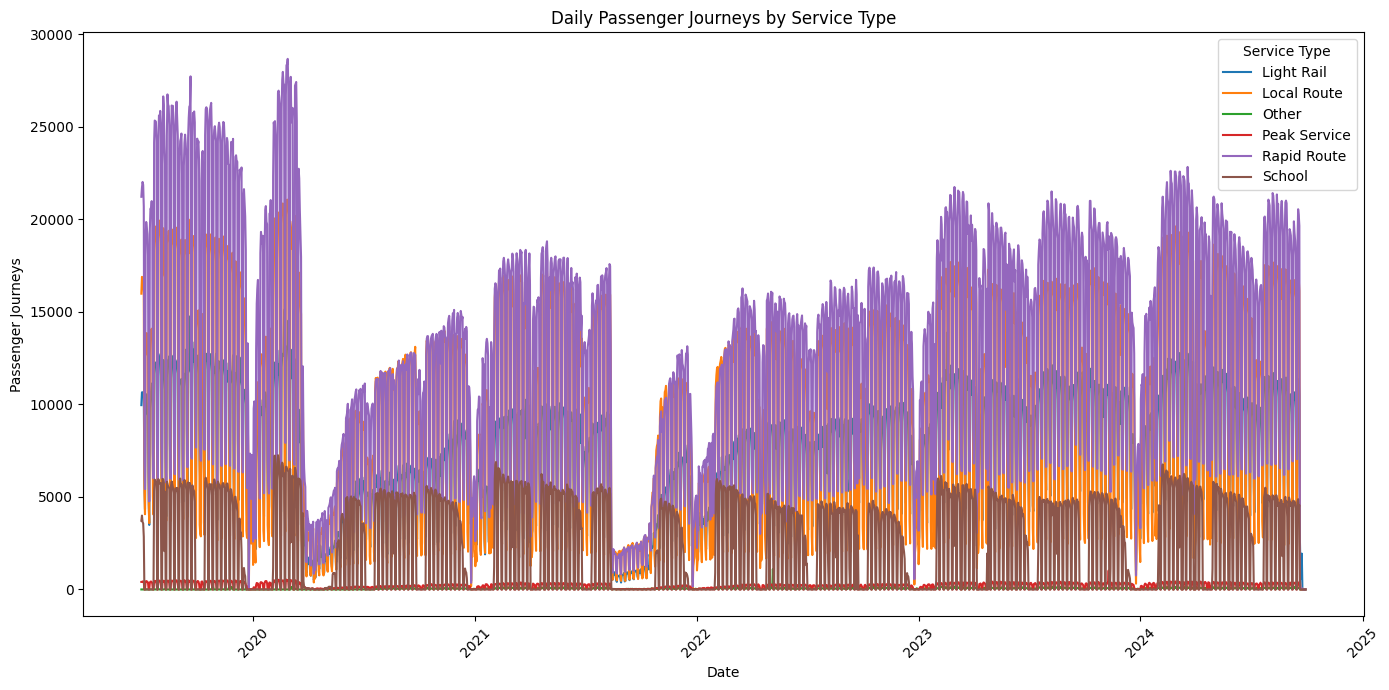

In [14]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_grouped, x='Date', y='Passenger Journeys', hue='Service Type')
plt.title("Daily Passenger Journeys by Service Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔍 Key Insights:

#### Insight 1:
Local Route consistently has the highest passenger usage across the year.

#### Insight 2:
Light Rail usage peaked around January 2024 and then declined.

#### Insight 3:
School services drop sharply on weekends and holidays — highly weekday dependent.

#### Insight 4:
Rapid Route shows steady growth and may indicate increased preference.

#### Insight 5:
Peak Service has high variability and may correlate with office hours or events.


In [15]:
!pip install prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/qjl06iq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/bzd0sl94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23661', 'data', 'file=/tmp/tmp9k9sd0ez/qjl06iq_.json', 'init=/tmp/tmp9k9sd0ez/bzd0sl94.json', 'output', 'file=/tmp/tmp9k9sd0ez/prophet_model5jxiryoc/prophet_model-20250527051245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


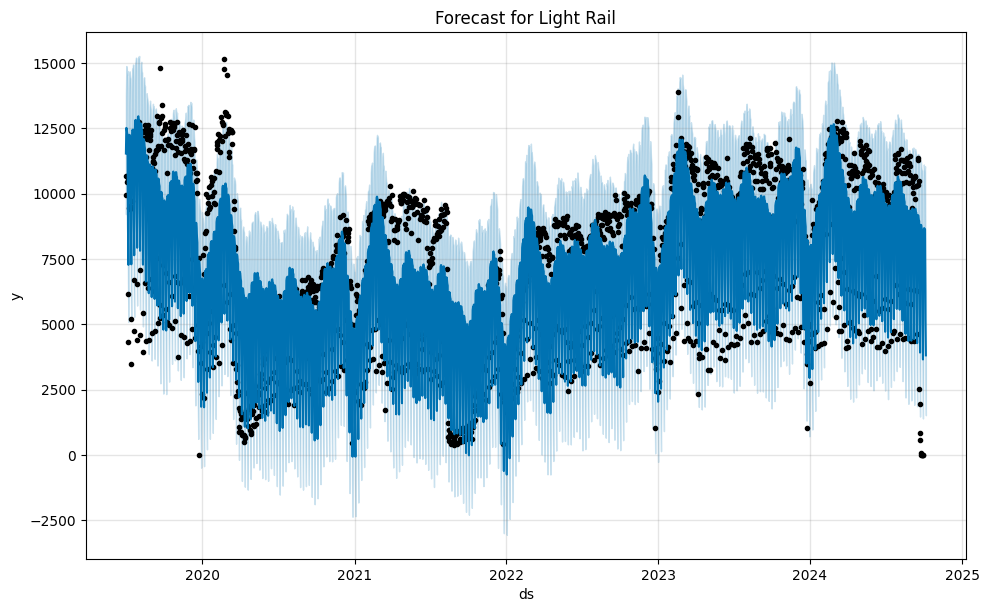

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/563kr9vu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/e9cc23wu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64341', 'data', 'file=/tmp/tmp9k9sd0ez/563kr9vu.json', 'init=/tmp/tmp9k9sd0ez/e9cc23wu.json', 'output', 'file=/tmp/tmp9k9sd0ez/prophet_modele6_xbv7c/prophet_model-20250527051247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


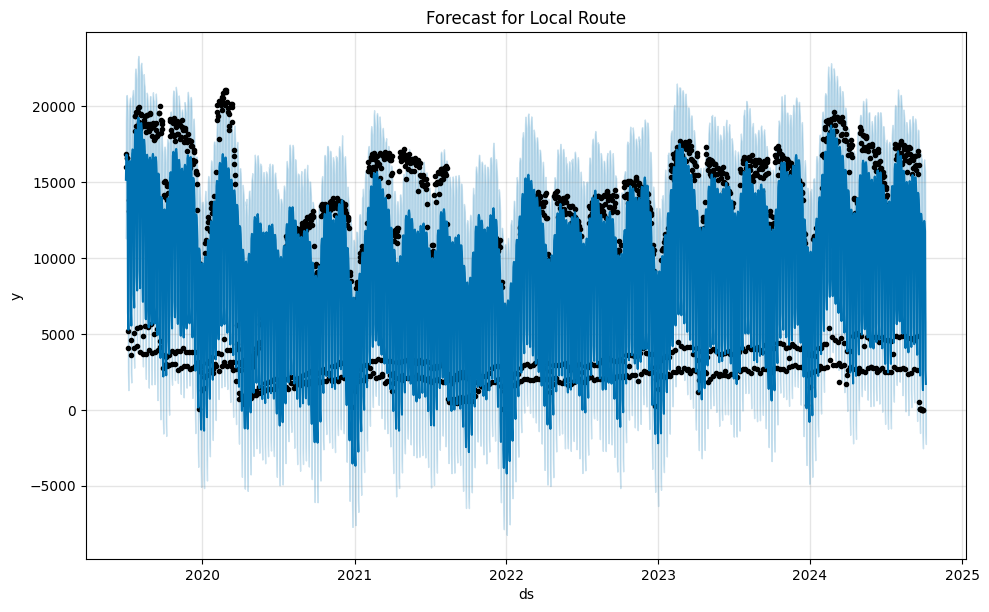

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/zec9yi4q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/agp6chry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38065', 'data', 'file=/tmp/tmp9k9sd0ez/zec9yi4q.json', 'init=/tmp/tmp9k9sd0ez/agp6chry.json', 'output', 'file=/tmp/tmp9k9sd0ez/prophet_model620z22q3/prophet_model-20250527051248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


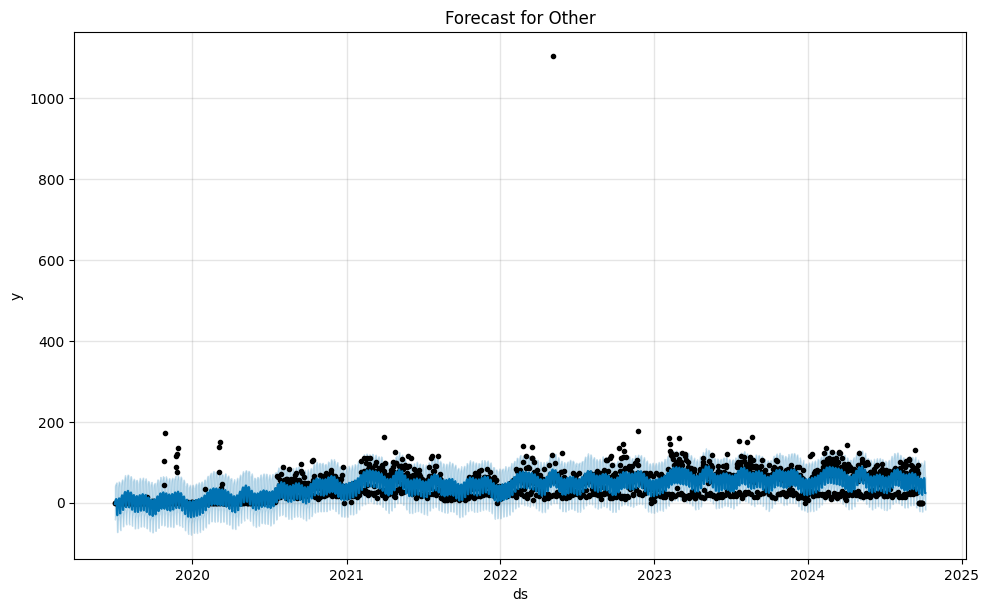

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/gwt65pfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/stp__qr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77902', 'data', 'file=/tmp/tmp9k9sd0ez/gwt65pfx.json', 'init=/tmp/tmp9k9sd0ez/stp__qr7.json', 'output', 'file=/tmp/tmp9k9sd0ez/prophet_modele4spurrg/prophet_model-20250527051249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


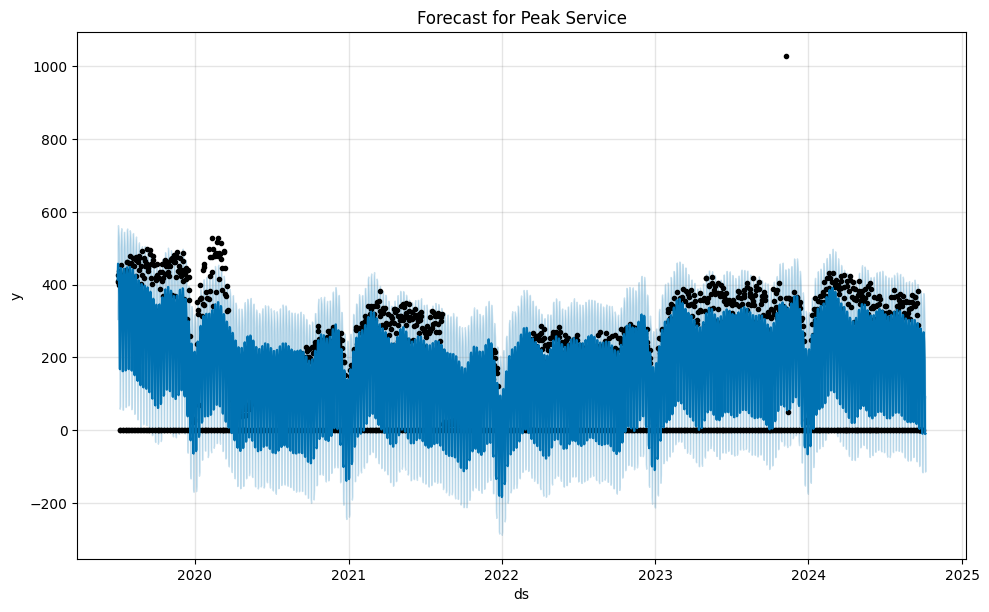

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/jyju9z6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/gjronpuk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97019', 'data', 'file=/tmp/tmp9k9sd0ez/jyju9z6t.json', 'init=/tmp/tmp9k9sd0ez/gjronpuk.json', 'output', 'file=/tmp/tmp9k9sd0ez/prophet_modelv4do5360/prophet_model-20250527051251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


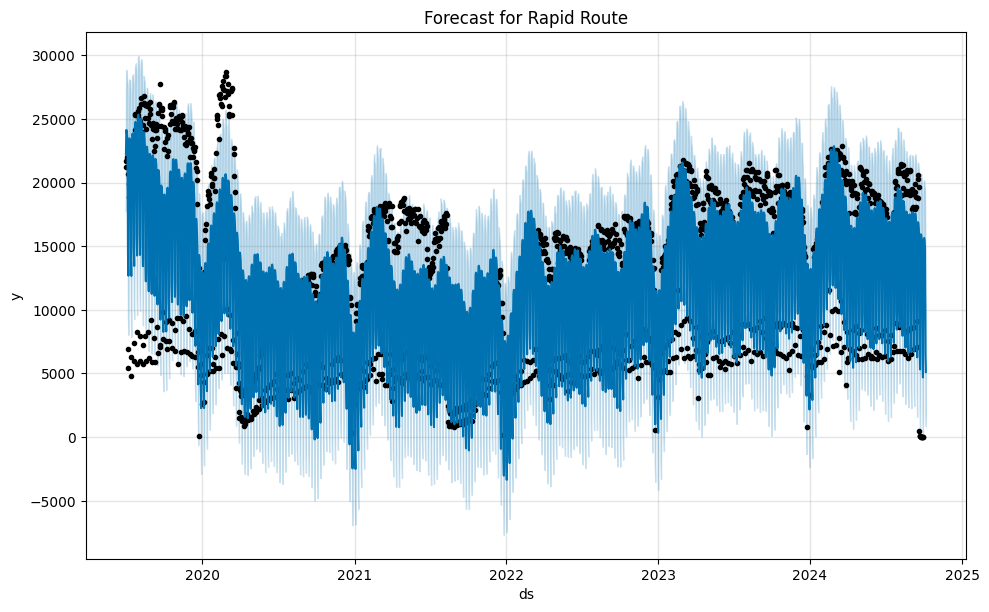

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/0cics6m4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9k9sd0ez/c3_ltjdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24396', 'data', 'file=/tmp/tmp9k9sd0ez/0cics6m4.json', 'init=/tmp/tmp9k9sd0ez/c3_ltjdn.json', 'output', 'file=/tmp/tmp9k9sd0ez/prophet_models9jedbmh/prophet_model-20250527051252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


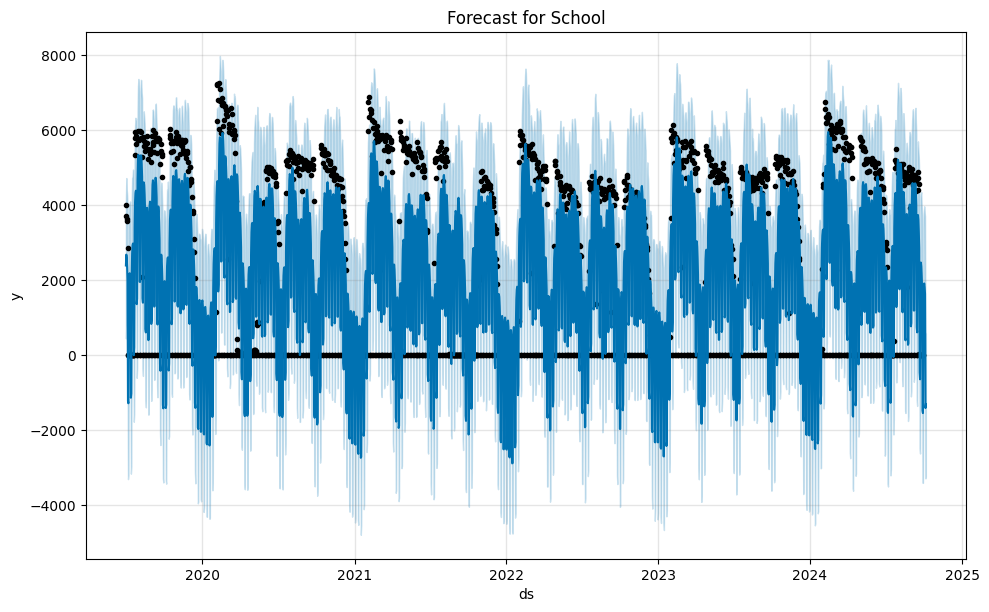

In [16]:
from prophet import Prophet

service_list = df_grouped['Service Type'].unique()
forecasts = {}

for service in service_list:
    data = df_grouped[df_grouped['Service Type'] == service][['Date', 'Passenger Journeys']]
    data.columns = ['ds', 'y']

    model = Prophet()
    model.fit(data)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    forecasts[service] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Plotting
    model.plot(forecast)
    plt.title(f"Forecast for {service}")
    plt.show()
